In [1]:
import pandas as pd

In [2]:
bill = pd.read_csv("electricity_bill.csv")
bill

,Units_Consumed,Electricity_Bill
0,152,1010.93
1,485,3861.19
2,398,3210.64
3,320,2678.67
4,156,1239.04
...,...,...
495,199,1640.91
496,363,2577.80
497,107,1047.46
498,391,2989.52


In [3]:
bill.isnull().sum()

Units_Consumed      0
Electricity_Bill    0
dtype: int64

In [4]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Units_Consumed    500 non-null    int64  
 1   Electricity_Bill  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [5]:
bill.describe()

,Units_Consumed,Electricity_Bill
count,500.000000,500.000000
mean,278.468000,2237.826760
std,126.941835,1037.817674
min,51.000000,89.180000
25%,177.000000,1366.145000
50%,277.500000,2251.090000
75%,391.000000,3053.442500
max,500.000000,4466.780000


# feature selection/engineering

In [6]:
x=bill[['Units_Consumed']]
x
y=bill.iloc[:,1]
y

0      1010.93
1      3861.19
2      3210.64
3      2678.67
4      1239.04
        ...   
495    1640.91
496    2577.80
497    1047.46
498    2989.52
499    2232.16
Name: Electricity_Bill, Length: 500, dtype: float64

# model selection

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train

,Units_Consumed
249,162
433,305
19,358
322,109
332,282
...,...
106,459
270,252
348,471
435,177


In [9]:
x_test

,Units_Consumed
361,243
73,130
374,433
155,306
104,102
...,...
347,469
86,267
75,99
438,272


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
d = bill.dropna() 

In [12]:
x = bill[['Units_Consumed']]
y = bill.iloc[:,1]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred=lr.predict(x_test)
y_pred

array([1962.6179869 , 1074.33162998, 3456.19681711, 2457.85728323,
        854.22527605, 2662.24175473, 1970.47892811, 1074.33162998,
       3802.07823042, 3975.01893708, 1396.63021966,  924.97374696,
        469.03915668, 1939.03516326, 2615.07610746,  736.31115788,
       1616.73657358,  610.53609849, 1215.82857179, 1946.89610447,
       1640.31939722, 1899.7304572 , 1994.06175174, 3181.0638747 ,
       3267.53422803,  744.17209909,  893.52998211, 3401.17022863,
       2300.638459  , 1593.15374995,  594.81421607, 2072.67116386,
        893.52998211,  846.36433484, 3181.0638747 , 1215.82857179,
        822.78151121, 3825.66105406, 2206.30716446, 3471.91869953,
       3385.44834621, 2827.32152018, 2701.54646079, 1695.3459857 ,
       3149.62010986, 3487.64058196, 1247.27233664, 3039.56693289,
       3369.72646378, 3692.02505346, 2056.94928144,  665.56268697,
       2253.47281173,  571.23139243,  791.33774636, 3487.64058196,
       2119.83681113, 1616.73657358, 3039.56693289,  453.31727

In [16]:
y_test

361    2158.84
73      634.39
374    3400.93
155    2229.05
104     769.93
        ...   
347    3704.56
86     1938.87
75     1039.92
438    2352.00
15     2627.50
Name: Electricity_Bill, Length: 100, dtype: float64

In [17]:
from sklearn.metrics import r2_score

In [18]:
 r2_score(y_test,y_pred)

0.9429718725608217

In [19]:
import matplotlib.pyplot as plt

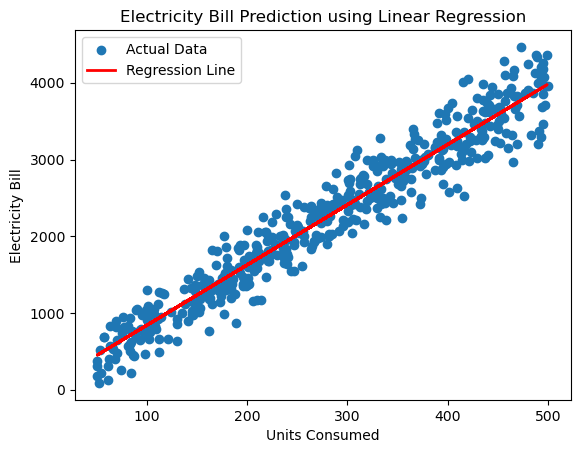

In [20]:
plt.scatter(x, y, label="Actual Data")
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Units Consumed")
plt.ylabel("Electricity Bill")
plt.title("Electricity Bill Prediction using Linear Regression")
plt.legend()
plt.show()

In [21]:
unit = float(input("Enter current electricity units: "))

predicted_bill = lr.predict([[unit]])

print("⚡-----------------------------⚡")
print("Units Consumed:", unit)
print("Predicted Electricity Bill: ₹", round(predicted_bill[0], 2))
print("⚡-----------------------------⚡")

Enter current electricity units:  200


⚡-----------------------------⚡
Units Consumed: 200.0
Predicted Electricity Bill: ₹ 1624.6
⚡-----------------------------⚡


C:\Users\sudha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
